In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import squarify
import textwrap

In [2]:
engineSize = pd.read_csv(r"C:\\Users\\Joe\\OneDrive\\Documents\\250515_Vehicle_Licensing_Data\\df_VEH0270.csv", on_bad_lines='skip')

In [3]:
engineSize.head()

,BodyType,Make,GenModel,Model,Fuel,EngineSizeSimple,EngineSizeDesc,2023,2022,2021,2020,2019,2018,2017,2016,2015
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,1400,1301cc to 1400cc,0,0,0,0,8,12,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,0,0,0,0,14,15,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,1400,1301cc to 1400cc,1,0,0,0,35,542,358,159,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,0,0,0,0,207,402,91,36,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,1400,1301cc to 1400cc,0,0,0,0,0,2,63,0,0


In [4]:
engineSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80821 entries, 0 to 80820
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BodyType          80821 non-null  object
 1   Make              80819 non-null  object
 2   GenModel          80818 non-null  object
 3   Model             80819 non-null  object
 4   Fuel              80821 non-null  object
 5   EngineSizeSimple  80821 non-null  object
 6   EngineSizeDesc    80821 non-null  object
 7   2023              80821 non-null  int64 
 8   2022              80821 non-null  int64 
 9   2021              80821 non-null  int64 
 10  2020              80821 non-null  int64 
 11  2019              80821 non-null  int64 
 12  2018              80821 non-null  int64 
 13  2017              80821 non-null  int64 
 14  2016              80821 non-null  int64 
 15  2015              80821 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 9.9+ MB


In [5]:
engineSize.describe()

,2023,2022,2021,2020,2019,2018,2017,2016,2015
count,80821.000000,80821.000000,80821.000000,80821.000000,80821.000000,80821.000000,80821.000000,80821.000000,80821.000000
mean,31.359548,26.942973,28.063115,26.742307,36.674095,37.081192,39.219510,41.663912,40.614494
std,290.137721,264.299181,254.412545,220.810080,301.761330,321.316154,336.411825,360.933930,371.359896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,19836.000000,30354.000000,22820.000000,14923.000000,19714.000000,29112.000000,21858.000000,30403.000000,39137.000000


In [6]:
engineSize_clean = engineSize.dropna()
engineSize_clean = engineSize_clean[
    ~engineSize_clean['EngineSizeSimple'].isin(['[z]', '[x]'])
]

In [7]:
top_engine_sizes = (
    engineSize_clean.groupby('EngineSizeSimple')['2023']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

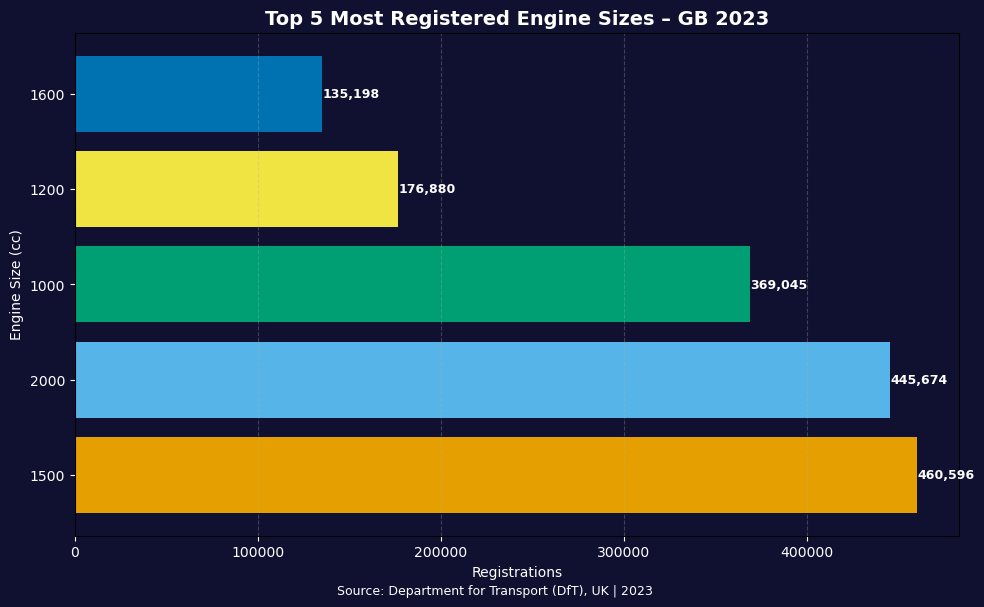

In [8]:
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]

fig, ax = plt.subplots(figsize=(10, 6), facecolor="#101031")
ax.set_facecolor("#101031")

bars = ax.barh(top_engine_sizes.index, top_engine_sizes.values, color=colors)

# Title and labels
ax.set_title("Top 5 Most Registered Engine Sizes – GB 2023", fontsize=14, fontweight='bold', color='white')
plt.figtext(0.5, 0.0005, "Source: Department for Transport (DfT), UK | 2023", ha="center", fontsize=9, color="white")
ax.set_xlabel("Registrations", color='white')
ax.set_ylabel("Engine Size (cc)", color='white')

# Axis ticks
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Add values next to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2, f"{int(width):,}",
            va='center', color='white', fontsize=9, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [9]:
engineSize = pd.read_csv(r"C:\\Users\\Joe\\OneDrive\\Documents\\250515_Vehicle_Licensing_Data\\estimated_vehicle_prices_1999_2023_realistic_varied.csv", on_bad_lines='skip')

In [10]:
df['EngineSizeSimple'] = pd.to_numeric(df['EngineSizeSimple'], errors='coerce')

NameError: name 'df' is not defined

In [ ]:
df_plot = df[(df['EngineSizeSimple'] >= 1000) & (df['EngineSizeSimple'] <= 2000)].copy()

In [ ]:
df_plot['2023_Used'] = df_plot['2020_New'] * np.random.uniform(0.88, 0.95, len(df_plot))
df_plot['2023_New'] = df_plot['2023_New'] * np.random.uniform(0.95, 1.05, len(df_plot))

In [ ]:
# Limit prices to a maximum of £50,000
df_plot['2023_New'] = df_plot['2023_New'].clip(upper=50000)
df_plot['2023_Used'] = df_plot['2023_Used'].clip(upper=50000)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7), facecolor="#101031")
ax.set_facecolor("#101031")

# Scatter plots with 'x' markers
ax.scatter(df_plot['EngineSizeSimple'], df_plot['2023_New'], color='#56B4E9',
           s=20, alpha=0.5, marker='x', label='NEW Price 2023')
ax.scatter(df_plot['EngineSizeSimple'], df_plot['2023_Used'], color='#E69F00',
           s=20, alpha=0.5, marker='x', label='USED Price (2020 registered) in 2023')

# Trendlines
z_new = np.polyfit(df_plot['EngineSizeSimple'], df_plot['2023_New'], 1)
p_new = np.poly1d(z_new)
ax.plot(np.sort(df_plot['EngineSizeSimple']), p_new(np.sort(df_plot['EngineSizeSimple'])),
        color='#56B4E9', linestyle='--', linewidth=2, alpha=0.9, label='NEW Price Trend')

z_used = np.polyfit(df_plot['EngineSizeSimple'], df_plot['2023_Used'], 1)
p_used = np.poly1d(z_used)
ax.plot(np.sort(df_plot['EngineSizeSimple']), p_used(np.sort(df_plot['EngineSizeSimple'])),
        color='#E69F00', linestyle='--', linewidth=2, alpha=0.9, label='USED Price Trend')

# Labels and Styling
ax.set_title('Realistic Varied Engine Size vs. Price (1000cc - 2000cc)\n2023 NEW vs. 2020-registered USED',
             fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Engine Size (cc)', fontsize=12, color='white')
ax.set_ylabel('Price (£)', fontsize=12, color='white')
ax.set_ylim(20000, 50000)
ax.tick_params(colors='white')

# Legend and grid
legend = ax.legend(facecolor='#222', edgecolor='white')
plt.setp(legend.get_texts(), color='white')
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
engineSize = pd.read_csv(r"C:\\Users\\Joe\\OneDrive\\Documents\\250515_Vehicle_Licensing_Data\\df_VEH0270.csv", on_bad_lines='skip')

In [12]:
# Clean data
engineSize_clean = engineSize.dropna()
engineSize_clean = engineSize_clean[~engineSize_clean['EngineSizeSimple'].isin(['[z]', '[y]', '[x]'])]
engineSize_clean['EngineSizeSimple'] = pd.to_numeric(engineSize_clean['EngineSizeSimple'], errors='coerce')

In [15]:
# Filter to 1500cc
cc_1500 = engineSize_clean[engineSize_clean['EngineSizeSimple'] == 1500].copy()

# Create CarName label
cc_1500['CarName'] = cc_1500['Make'].str.upper() + " " + cc_1500['Model'].str.upper()

# Group and get top 5
top_5_models = (
    cc_1500.groupby('CarName')['2023']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

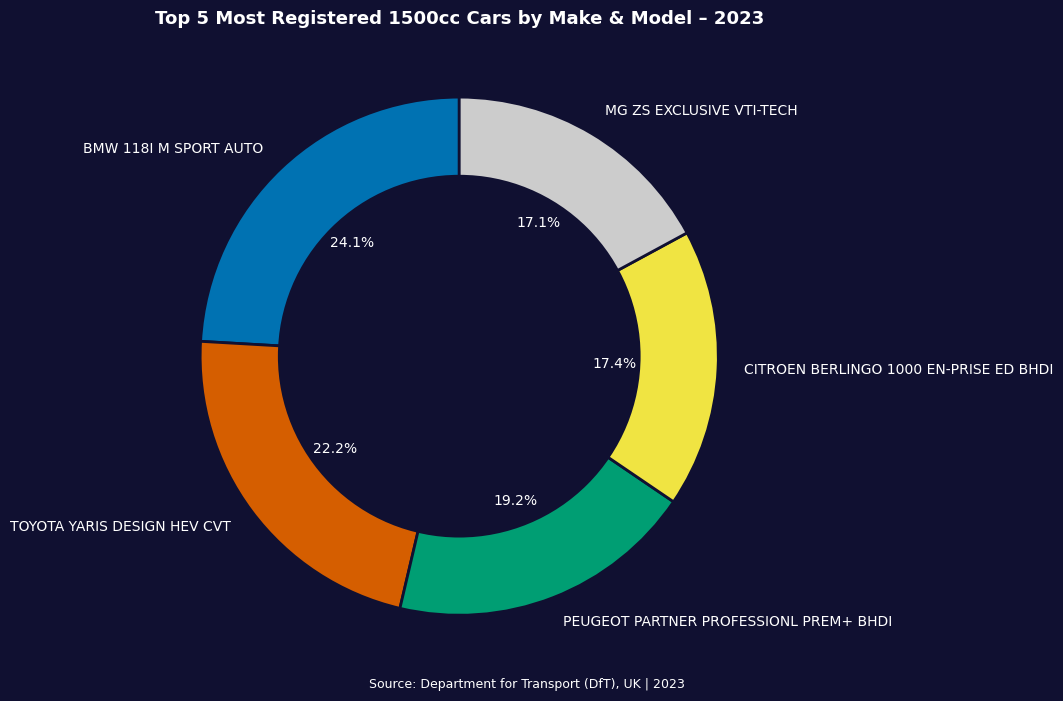

In [16]:
colors = ["#0072B2", "#D55E00", "#009E73", "#F0E442", "#CCCCCC"]

# Create donut chart
fig, ax = plt.subplots(figsize=(10, 7), facecolor="#101031")
ax.set_facecolor("#101031")

def format_pct(pct):
    return f"{pct:.1f}%"

wedges, texts, autotexts = ax.pie(
    top_5_models,
    labels=top_5_models.index,
    autopct=format_pct,
    startangle=90,
    colors=colors,
    textprops={'color': 'white'},
    wedgeprops={'linewidth': 2, 'edgecolor': '#101031'}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='#101031')
fig.gca().add_artist(centre_circle)

# Title and footer
ax.set_title("Top 5 Most Registered 1500cc Cars by Make & Model – 2023",
             fontsize=13, fontweight='bold', color='white')
plt.figtext(0.5, 0.01, "Source: Department for Transport (DfT), UK | 2023",
            ha="center", fontsize=9, color="white")

plt.tight_layout()
plt.show()